# Exploring the Microbiome - MED-263 Final
## Lucas Patel & Yotam Voskoboynik

### Table of Contents

* [Introduction ](#introduction)
    * [What is the microbiome?](#what-is-the-microbiome)
    * [Data retrieval](#data-retrieval)
* [Exploration](#exploration)
    * [Abundance](#abundance)
    * [Prevalence](#prevalence)
* [Diversity Analysis](#diversity-analysis)
    * [Alpha-Diversity](#alpha)
    * [Beta-Diversity](#beta)
* [Conclusion](#conclusion)
        
---

## Introduction <a name="introduction"></a>

### What is the microbiome? <a name="what-is-the-microbiome"></a>

The microbiome refers to the complex environments in which microorganisms thrive under various conditions. The study of the microbiome looks at the differences between communities and assesses concepts such as the relative proportions of different taxa, their impacts on each other, and their changes over time. Microbiomes can be derived from the environment, such as oceans or the atmosphere, from food and waste, or even from inside the bodies of other larger organisms. The software described below facilitates the analysis of microbial communities and the following guide is an overview of these software functionalities.

### Data retrieval <a name="section_1_2"></a>

First, install the microbiome `mia` package (and `miaViz`) if not already done:

In [1]:
if(!require("miaViz")){  
    BiocManager::install("miaViz")
}
if(!require("mia")){  
    BiocManager::install("mia")
}

library("mia")
library("miaViz")

Loading required package: miaViz

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats,

In [2]:
# Optional
# Not required for our analysis, useful for finding preloaded microbiome datasets 
if(!require("microbiomeDataSets")){
    BiocManager::install("microbiomeDataSets")
}

Loading required package: microbiomeDataSets



The `mia` package features a variety of functions to import microbiome data from numerous input file formats including CSV and QIIME2. However, for simplicity we will load the built in microbiome data as follows:

In [17]:
data(GlobalPatterns, package="mia") 
gp_mia <- GlobalPatterns
gp_mia

class: TreeSummarizedExperiment 
dim: 19216 26 
metadata(0):
assays(1): counts
rownames(19216): 549322 522457 ... 200359 271582
rowData names(7): Kingdom Phylum ... Genus Species
colnames(26): CL3 CC1 ... Even2 Even3
colData names(7): X.SampleID Primer ... SampleType Description
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
rowLinks: a LinkDataFrame (19216 rows)
rowTree: 1 phylo tree(s) (19216 leaves)
colLinks: NULL
colTree: NULL

As you can see, the above data set is a `TreeSummarizedExperiment`. A `TreeSummarizedExperiment` is an extension of the `SummarizedExperiment` class in R, which is a convenient way of storing tabular data that is common in genomics. The `TreeSummarizedExperiment` adds further improvements for hierarchical data which is very relevant in the analysis of the microbiome where hierarchical phylogenetic trees are common.

![TSE](https://raw.githubusercontent.com/fionarhuang/TreeSummarizedExperiment/master/vignettes/tse.png)

We can explore a bit of the data as follows:

In [19]:
rowData(gp_mia)

DataFrame with 19216 rows and 7 columns
           Kingdom        Phylum        Class        Order        Family
       <character>   <character>  <character>  <character>   <character>
549322     Archaea Crenarchaeota Thermoprotei           NA            NA
522457     Archaea Crenarchaeota Thermoprotei           NA            NA
951        Archaea Crenarchaeota Thermoprotei Sulfolobales Sulfolobaceae
244423     Archaea Crenarchaeota        Sd-NA           NA            NA
586076     Archaea Crenarchaeota        Sd-NA           NA            NA
...            ...           ...          ...          ...           ...
278222    Bacteria           SR1           NA           NA            NA
463590    Bacteria           SR1           NA           NA            NA
535321    Bacteria           SR1           NA           NA            NA
200359    Bacteria           SR1           NA           NA            NA
271582    Bacteria           SR1           NA           NA            NA
           

As we proceed in this tutorial, we may want to use different datasets for different exploratory purposes. While this demonstration data gives us a good overview on how the data is structured, it lacks human-readable phylogenic information. In order to list all the available datasets we can use another package `microbiomeDataSets` that features microbial datasets from literature already processed and stored in `TreeSummarizedExperiment` objects.

In [20]:
# Optional
library(microbiomeDataSets)
availableDataSets()

Dataset
<chr>
GrieneisenTSData
HintikkaXOData
LahtiMLData
LahtiMData
LahtiWAData
OKeefeDSData
SilvermanAGutData
SongQAData
SprockettTHData


## Exploration <a name="exploration"></a>

The `mia` package offers several ways to explore microbial data. In this section we'll cover abundance and prevalence.

To do this, we'll use data from the [Lahti et al. 2014](https://www.nature.com/articles/ncomms5344.pdf?origin=ppub) paper "Tipping elements in the human intestinal ecosystem" and load this data from the `microbiomeDataSets` package.

### Abundance <a name="abundance"></a>

Relative abundance as a term in ecology refers to "the percent composition of an organism of a particular kind relative to the total number of organisms in the area" where in this case the "area" refers to the intestinal microbiome of western inhabitants.

To visualize this, we will plot the abundances of the entries with the highest relative abundances within this data set.

snapshotDate(): 2021-10-19

see ?microbiomeDataSets and browseVignettes('microbiomeDataSets') for documentation

loading from cache

see ?microbiomeDataSets and browseVignettes('microbiomeDataSets') for documentation

loading from cache

see ?microbiomeDataSets and browseVignettes('microbiomeDataSets') for documentation

loading from cache



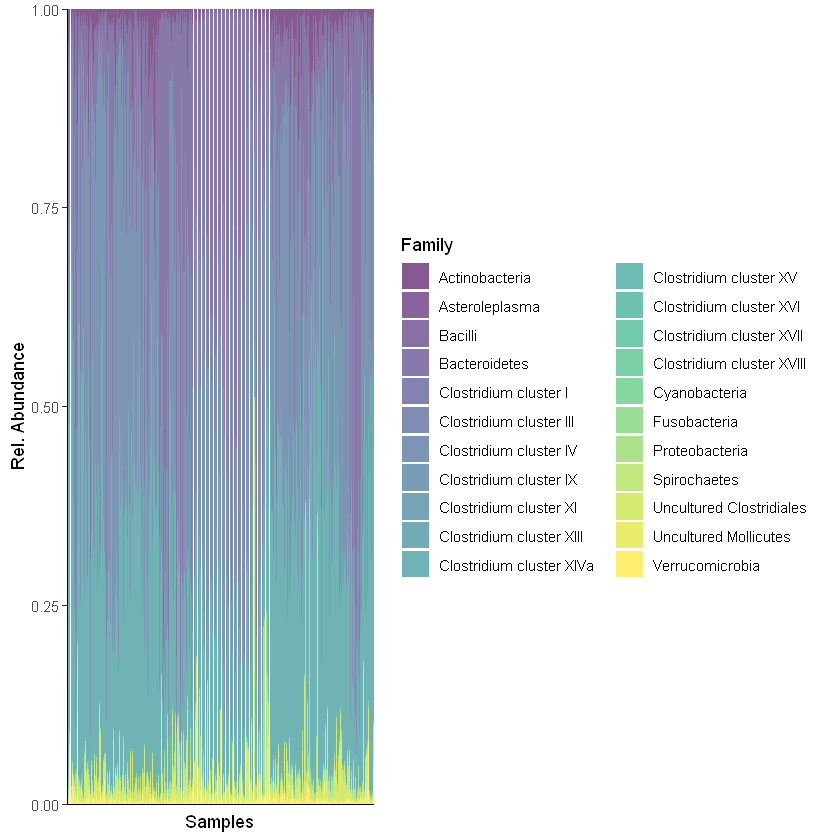

In [21]:
tse <- atlas1006() # refers to LahtiWAData above

# Counts relative abundances
tse <- transformSamples(tse, method = "relabundance")
plotAbundance(tse, abund_values = "relabundance", rank="Family")

We can see relatively high abundances for families like Bacteroidetes and much lower abundances for families like Spirochaetes.  

While pretty, this isn't super useful for delinating granular patterns, so we'll graph abundances again at a finer taxonomical level and use both a jitter plot and a density plot with the first 10 entries for simplicity.

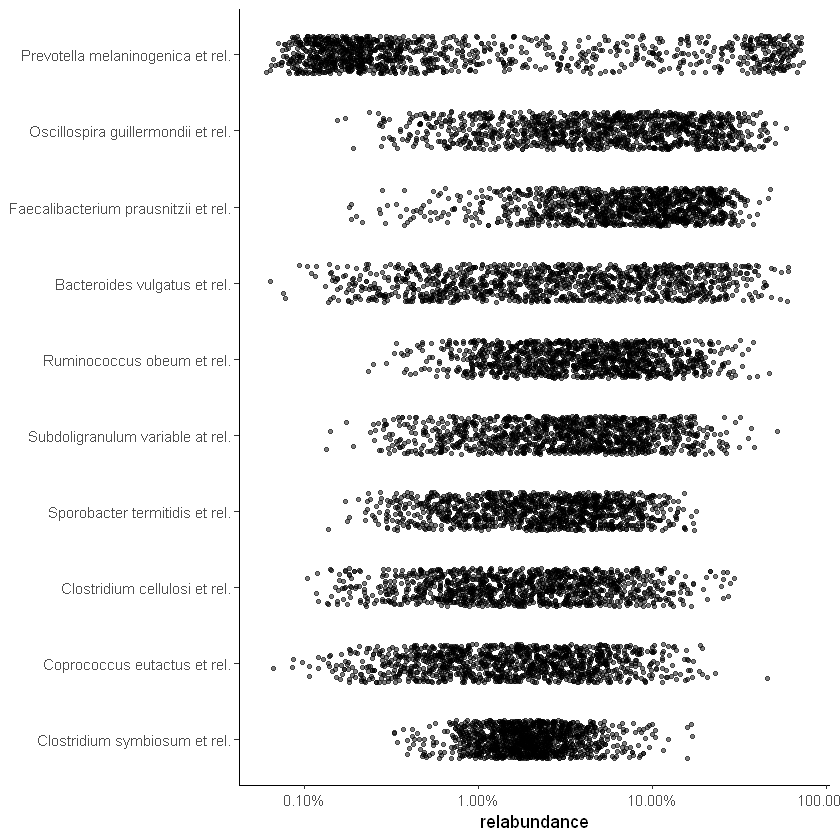

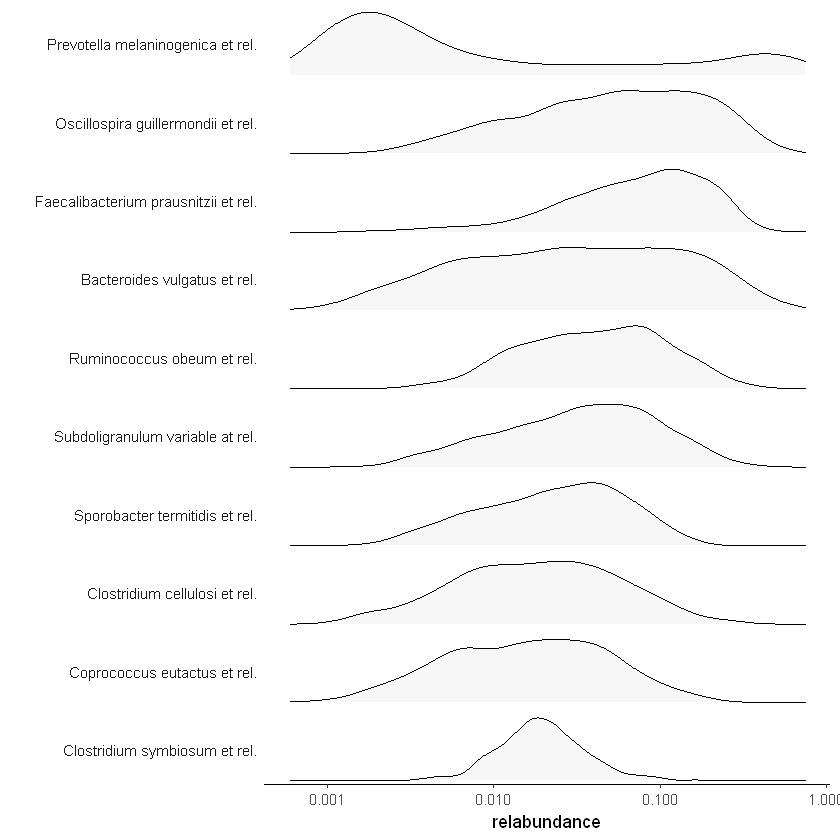

In [22]:
plotAbundanceDensity(tse, layout = "jitter", abund_values = "relabundance",
                     n = 10, point_size=1, point_shape=19, point_alpha=0.5) + 
                     scale_x_log10(label=scales::percent)


plotAbundanceDensity(tse, layout = "density", abund_values = "relabundance",
                     n = 10,  point_alpha=1/10 ) +
                     scale_x_log10()

While the density plots seem to show rather uninteresting distributions, remember that these `TreeSummarizedExperiment` datasets contain metadata. We can check the metadata for the study participants like so:

In [23]:
names(colData(tse))

[1] "age"                   "sex"                   "nationality"          
 [4] "DNA_extraction_method" "project"               "diversity"            
 [7] "bmi_group"             "subject"               "time"                 
[10] "sample"

Then we can color the density plot using this participant metadata to look for interesting patterns.

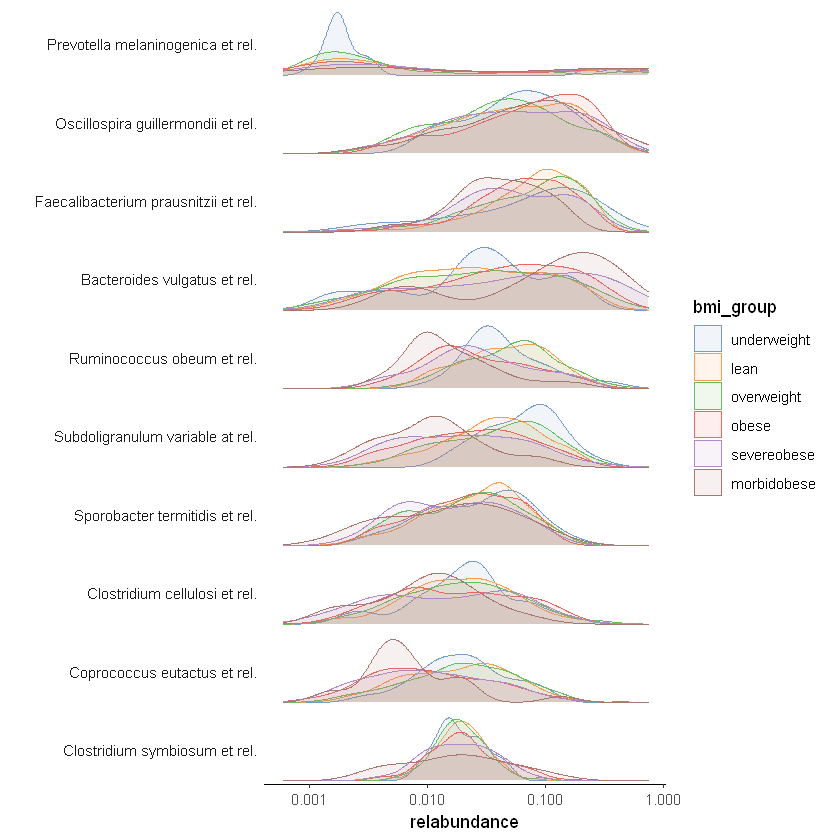

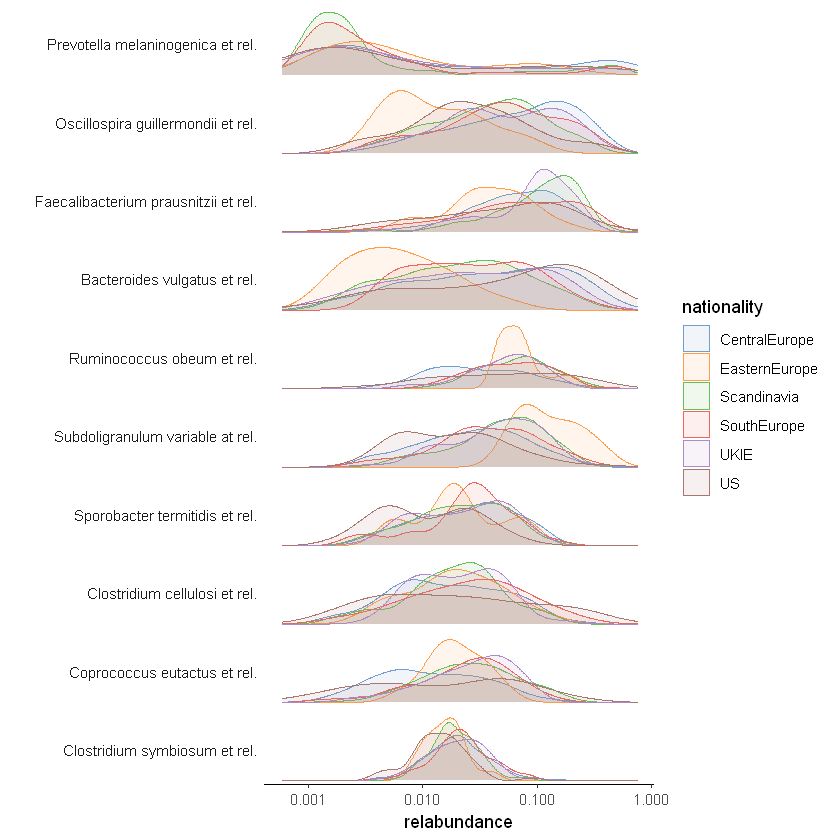

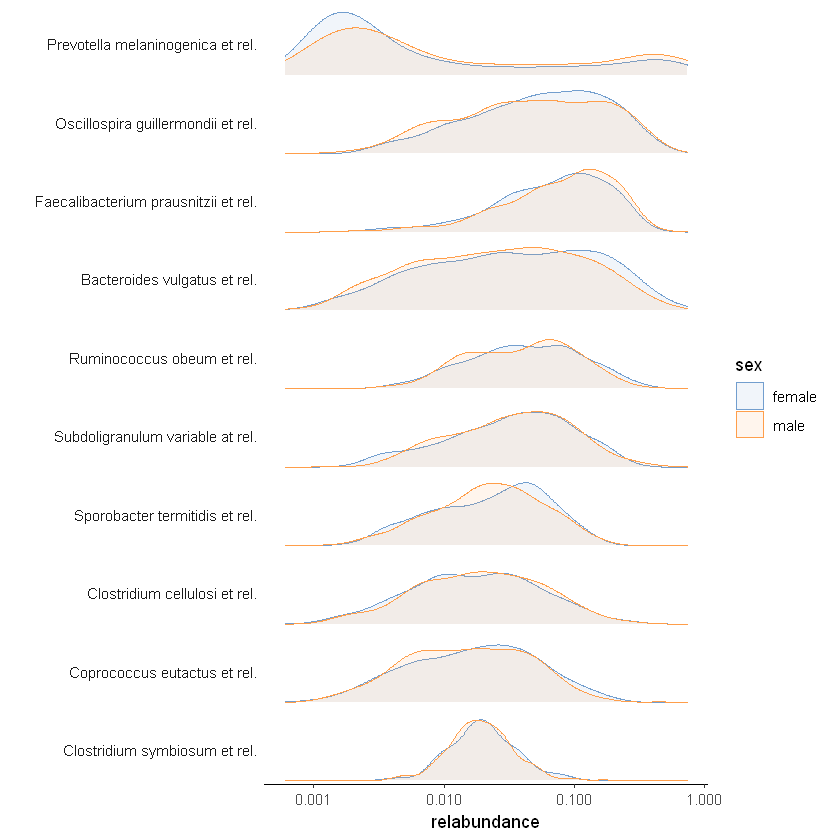

In [24]:
plotAbundanceDensity(tse, layout = "density", abund_values = "relabundance",
                     n = 10, colour_by="bmi_group", point_alpha=1/10 ) +
                     scale_x_log10()
plotAbundanceDensity(tse, layout = "density", abund_values = "relabundance",
                     n = 10, colour_by="nationality", point_alpha=1/10 ) +
                     scale_x_log10()
plotAbundanceDensity(tse, layout = "density", abund_values = "relabundance",
                     n = 10, colour_by="sex", point_alpha=1/10 ) +
                     scale_x_log10()

Much more interesting! As you can see there is variability in the distribution of taxa for different nationalities and for different BMI groups. The uncolored versions of these plots show the cumulative average across all samples, but breaking down abundances in this way can reveal patterns for further study.



These results are also suggestive of one of Lahti et al's biggest takeaways, that certain intestinal bacterial abundances exhibit bimodal distributions where bacteria are  highly-abundant in some but not abundant in other samples, as in for example Bacteriodes vulgatis. See Lahti et al below:

```
Here, based on a deep phylogenetic analysis of the intestinal microbiota in a thousand western adults, we identify groups of bacteria that exhibit robust bistable abundance distributions. These bacteria are either abundant or nearly absent in most individuals, and exhibit decreased temporal stability at the intermediate abundance range. The abundances of these bimodally distributed bacteria vary independently, and their abundance distributions are not affected by short-term dietary interventions. However, their contrasting alternative states are associated with host factors such as ageing and overweight.
```

### Prevalence <a name="prevalence"></a>

Prevalence refers to the proportion of samples in the dataset where a certain microbial species is exhibited. Essentially, prevalence characterizes how common some microbial signal is rather than how strong it is. Prevalence is valuable because it allows for interpretation of patterns in the distribution of taxa.

Using `mia` and some helper code, we'll investigate the prevalences from the same dataset. And with `miaviz`, we can visualize the relative prevalences as well.

We'll start by reporting all the prevalences across the dataset.

In [25]:
getPrevalence(tse, detection = 1/100, as_relative = TRUE)

Actinomycetaceae                            Aerococcus 
                         0.0000000000                          0.0000000000 
                            Aeromonas                           Akkermansia 
                         0.0000000000                          0.1277150304 
         Alcaligenes faecalis et rel.                    Allistipes et rel. 
                         0.0000000000                          0.4934839270 
                   Anaerobiospirillum                          Anaerofustis 
                         0.0000000000                          0.0000000000 
          Anaerostipes caccae et rel.     Anaerotruncus colihominis et rel. 
                         0.5143353606                          0.0399652476 
      Anaerovorax odorimutans et rel.                      Aneurinibacillus 
                         0.0069504778                          0.0000000000 
                        Aquabacterium                Asteroleplasma et rel. 
                         0.0000000000                          0.0000000000 
                            Atopobium                              Bacillus 
                         0.0000000000                          0.0000000000 
         Bacteroides fragilis et rel.      Bacteroides intestinalis et rel. 
                         0.2276281494                          0.0026064292 
           Bacteroides ovatus et rel.          Bacteroides plebeius et rel. 
                         0.1251086012                          0.0703735882 
      Bacteroides splachnicus et rel.         Bacteroides stercoris et rel. 
                         0.0278019114                          0.0086880973 
        Bacteroides uniformis et rel.          Bacteroides vulgatus et rel. 
                         0.2015638575                          0.7315377932 
                      Bifidobacterium                     Bilophila et rel. 
                         0.4013900956                          0.0000000000 
                          Brachyspira      Bryantella formatexigens et rel. 
                         0.0000000000                          0.4874022589 
             Bulleidia moorei et rel.                          Burkholderia 
                         0.0000000000                          0.0000000000 
       Butyrivibrio crossotus et rel.                         Campylobacter 
                         0.7298001738                          0.0000000000 
    Catenibacterium mitsuokai et rel.           Clostridium (sensu stricto) 
                         0.0095569070                          0.0321459600 
        Clostridium cellulosi et rel.           Clostridium colinum et rel. 
                         0.6863596872                          0.0173761946 
        Clostridium difficile et rel.         Clostridium felsineum et rel. 
                         0.0851433536                          0.0000000000 
           Clostridium leptum et rel.            Clostridium nexile et rel. 
                         0.4717636838                          0.2641181581 
     Clostridium orbiscindens et rel.           Clostridium ramosum et rel. 
                         0.8314509123                          0.0008688097 
       Clostridium sphenoides et rel.      Clostridium stercorarium et rel. 
                         0.4761077324                          0.0104257168 
        Clostridium symbiosum et rel.      Clostridium thermocellum et rel. 
                         0.8714161599                          0.0000000000 
                          Collinsella    Coprobacillus catenaformis et rel. 
                         0.0399652476                          0.0008688097 
         Coprococcus eutactus et rel.                       Corynebacterium 
                         0.6472632493                          0.0000000000 
                Desulfovibrio et rel.                             Dialister 
                         0.0000000000                          0.1433536056 
        Dorea for

A bit tough to read, we can use some additional functions to make better sense of this.

In [26]:
getPrevalentTaxa(tse, detection = 1/100, as_relative = TRUE)
getRareTaxa(tse, detection = 1/100, as_relative = TRUE)

[1] "Anaerostipes caccae et rel."         
 [2] "Bacteroides vulgatus et rel."        
 [3] "Butyrivibrio crossotus et rel."      
 [4] "Clostridium cellulosi et rel."       
 [5] "Clostridium orbiscindens et rel."    
 [6] "Clostridium symbiosum et rel."       
 [7] "Coprococcus eutactus et rel."        
 [8] "Dorea formicigenerans et rel."       
 [9] "Faecalibacterium prausnitzii et rel."
[10] "Oscillospira guillermondii et rel."  
[11] "Ruminococcus obeum et rel."          
[12] "Sporobacter termitidis et rel."      
[13] "Subdoligranulum variable at rel."

[1] "Actinomycetaceae"                     
  [2] "Aerococcus"                           
  [3] "Aeromonas"                            
  [4] "Akkermansia"                          
  [5] "Alcaligenes faecalis et rel."         
  [6] "Allistipes et rel."                   
  [7] "Anaerobiospirillum"                   
  [8] "Anaerofustis"                         
  [9] "Anaerotruncus colihominis et rel."    
 [10] "Anaerovorax odorimutans et rel."      
 [11] "Aneurinibacillus"                     
 [12] "Aquabacterium"                        
 [13] "Asteroleplasma et rel."               
 [14] "Atopobium"                            
 [15] "Bacillus"                             
 [16] "Bacteroides fragilis et rel."         
 [17] "Bacteroides intestinalis et rel."     
 [18] "Bacteroides ovatus et rel."           
 [19] "Bacteroides plebeius et rel."         
 [20] "Bacteroides splachnicus et rel."      
 [21] "Bacteroides stercoris et rel."        
 [22] "Bacteroides uniformis et rel."        
 [23] "Bifidobacterium"                      
 [24] "Bilophila et rel."                    
 [25] "Brachyspira"                          
 [26] "Bryantella formatexigens et rel."     
 [27] "Bulleidia moorei et rel."             
 [28] "Burkholderia"                         
 [29] "Campylobacter"                        
 [30] "Catenibacterium mitsuokai et rel."    
 [31] "Clostridium (sensu stricto)"          
 [32] "Clostridium colinum et rel."          
 [33] "Clostridium difficile et rel."        
 [34] "Clostridium felsineum et rel."        
 [35] "Clostridium leptum et rel."           
 [36] "Clostridium nexile et rel."           
 [37] "Clostridium ramosum et rel."          
 [38] "Clostridium sphenoides et rel."       
 [39] "Clostridium stercorarium et rel."     
 [40] "Clostridium thermocellum et rel."     
 [41] "Collinsella"                          
 [42] "Coprobacillus catenaformis et rel."   
 [43] "Corynebacterium"                      
 [44] "Desulfovibrio et rel."                
 [45] "Dialister"                            
 [46] "Eggerthella lenta et rel."            
 [47] "Enterobacter aerogenes et rel."       
 [48] "Enterococcus"                         
 [49] "Escherichia coli et rel."             
 [50] "Eubacterium biforme et rel."          
 [51] "Eubacterium cylindroides et rel."     
 [52] "Eubacterium hallii et rel."           
 [53] "Eubacterium limosum et rel."          
 [54] "Eubacterium rectale et rel."          
 [55] "Eubacterium siraeum et rel."          
 [56] "Eubacterium ventriosum et rel."       
 [57] "Fusobacteria"                         
 [58] "Gemella"                              
 [59] "Granulicatella"                       
 [60] "Haemophilus"                          
 [61] "Helicobacter"                         
 [62] "Klebisiella pneumoniae et rel."       
 [63] "Lachnobacillus bovis et rel."         
 [64] "Lachnospira pectinoschiza et rel."    
 [65] "Lactobacillus catenaformis et rel."   
 [66] "Lactobacillus gasseri et rel."        
 [67] "Lactobacillus plantarum et rel."      
 [68] "Lactobacillus salivarius et rel."     
 [69] "Lactococcus"                          
 [70] "Leminorella"                          
 [71] "Megamonas hypermegale et rel."        
 [72] "Megasphaera elsdenii et rel."         
 [73] "Methylobacterium"                     
 [74] "Micrococcaceae"                       
 [75] "Mitsuokella multiacida et rel."       
 [76] "Moraxellaceae"                        
 [77] "Novosphingobium"                      
 [78] "Oceanospirillum"                      
 [79] "Outgrouping clostridium cluster XIVa" 
 [80] "Oxalobacter formigenes et rel."       
 [81] "Papillibacter cinnamivorans et rel."  
 [82] "Parabacteroides distasonis et rel."   
 [83] "Peptococcus niger et rel."            
 [84] "Peptostreptococcus anaerobius et rel."
 [85] "Peptostreptococcus micros et rel."    
 [86] "Phascolarctobacterium faecium et rel."
 [87] "Prevotella melaninogenica et rel."    


Of course, there are often many ways to accomplish the same goal. We can take the initial list and sort it from highest to lowest prevalence then just take the first few results.

In [27]:
head(getPrevalence(tse, detection = 1/100, sort = TRUE, as_relative = TRUE))

Faecalibacterium prausnitzii et rel.           Ruminococcus obeum et rel. 
                           0.9522155                            0.9139878 
  Oscillospira guillermondii et rel.        Clostridium symbiosum et rel. 
                           0.8801043                            0.8714162 
    Subdoligranulum variable at rel.     Clostridium orbiscindens et rel. 
                           0.8357950                            0.8314509

The results seem congruent. We might also want to capture taxa that miss the relative abundance threshold, yet are still present at some low raw-count frequency:

In [28]:
head(getPrevalence(tse, detection = 1, sort = TRUE, abund_values = "counts",
                   as_relative = FALSE))

Uncultured Mollicutes      Uncultured Clostridiales II 
                               1                                1 
      Uncultured Clostridiales I               Tannerella et rel. 
                               1                                1 
  Sutterella wadsworthia et rel. Subdoligranulum variable at rel. 
                               1                                1

Nice! We can also agglomerate to a higher taxonomical level to get a better sense of the phyla distribution:

In [29]:
altExp(tse,"Phylum") <- agglomerateByRank(tse, "Phylum")
head(getPrevalence(altExp(tse,"Phylum"), detection = 1/100, sort = TRUE,
                   abund_values = "counts", as_relative = TRUE))

Firmicutes   Bacteroidetes  Actinobacteria  Proteobacteria Verrucomicrobia 
   1.0000000000    0.9852302346    0.4821894005    0.2988705474    0.1277150304 
  Cyanobacteria 
   0.0008688097

And with a little data processing we can identify the top taxa and plot a tree to visualize the relationships.

Warning message in toTree(td):
"The root is added with label 'ALL'"


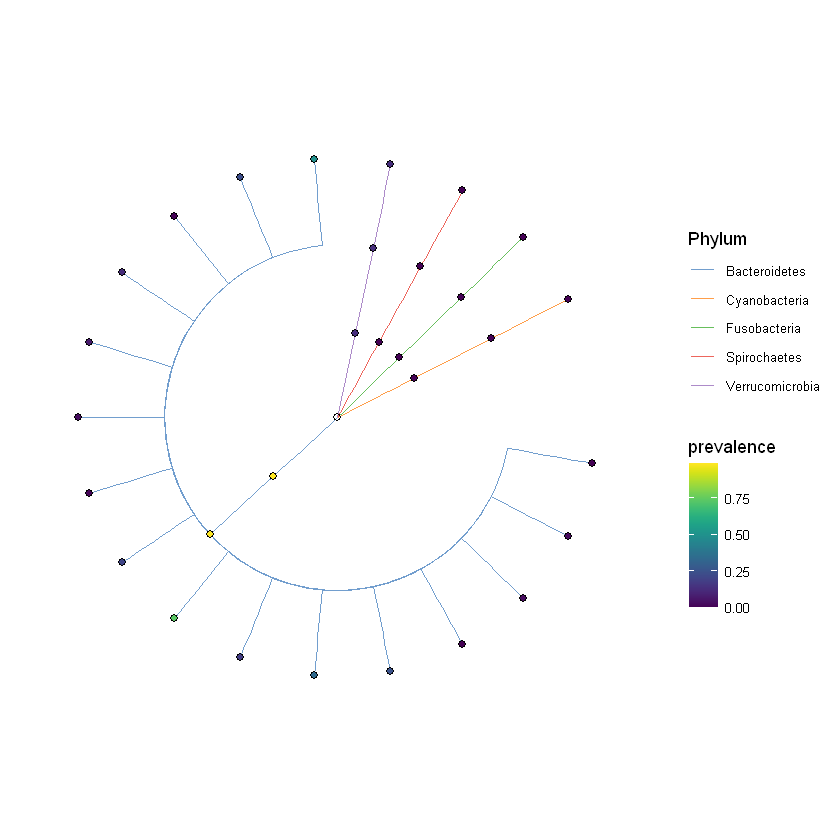

In [30]:
rowData(altExp(tse,"Phylum"))$prevalence <- 
    getPrevalence(altExp(tse,"Phylum"), detection = 1/100, sort = FALSE,
                  abund_values = "counts", as_relative = TRUE)
altExps(tse) <- splitByRanks(tse)
altExps(tse) <-
   lapply(altExps(tse),
          function(y){
              rowData(y)$prevalence <- 
                  getPrevalence(y, detection = 1/100, sort = FALSE,
                                abund_values = "counts", as_relative = TRUE)
              y
          })
top_phyla <- getTopTaxa(altExp(tse,"Phylum"),
                        method="prevalence",
                        top=5L,
                        abund_values="counts")
top_phyla_mean <- getTopTaxa(altExp(tse,"Phylum"),
                             method="mean",
                             top=5L,
                             abund_values="counts")
x <- unsplitByRanks(tse, ranks = taxonomyRanks(tse)[1:6])
x <- addTaxonomyTree(x)

plotRowTree(x[rowData(x)$Phylum %in% top_phyla,],
            edge_colour_by = "Phylum",
            tip_colour_by = "prevalence",
            node_colour_by = "prevalence")

## Diversity Analysis <a name="diversity-analysis"></a>

### Alpha-Diversity <a name="alpha"></a>

Alpha diversity, summarizes the distribution of species abundances in a given sample into a single number that depends on species richness and evenness.   
Diversity indices measure the overall community heterogeneity.

For this analysis we will be using the preloaded `mia` dataset `GlobalPatterns`, which comes from this article: https://www.pnas.org/doi/full/10.1073/pnas.1000080107, which looked at the  the microbial communities from 25 environmental samples and three known mock communities at an average depth of 3.1 million reads per sample in order to identify global patterns of 16S rRNA diversity at a depth of millions of sequences per sample (Caporaso, 2010).

In [32]:
tse <- GlobalPatterns

#### Non-Phylogenetic measures

`estimateDiversity`, calculates the selected diversity index based on the selected assay data

In [33]:
tse <- mia::estimateDiversity(tse, 
                              abund_values = "counts",
                              index = "shannon", 
                              name = "shannon")
head(colData(tse)$shannon)

CL3      CC1      SV1  M31Fcsw  M11Fcsw  M31Plmr 
6.576517 6.776603 6.498494 3.828368 3.287666 4.289269

estimateDiversity adds the calculated measures to the colData of the `SummarizedExperiment` under the given column `name`

In [34]:
tse

class: TreeSummarizedExperiment 
dim: 19216 26 
metadata(0):
assays(1): counts
rownames(19216): 549322 522457 ... 200359 271582
rowData names(7): Kingdom Phylum ... Genus Species
colnames(26): CL3 CC1 ... Even2 Even3
colData names(8): X.SampleID Primer ... Description shannon
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
rowLinks: a LinkDataFrame (19216 rows)
rowTree: 1 phylo tree(s) (19216 leaves)
colLinks: NULL
colTree: NULL

With the estimate now stored in our SummarizedExperiment we can plot it the same way we would any other column

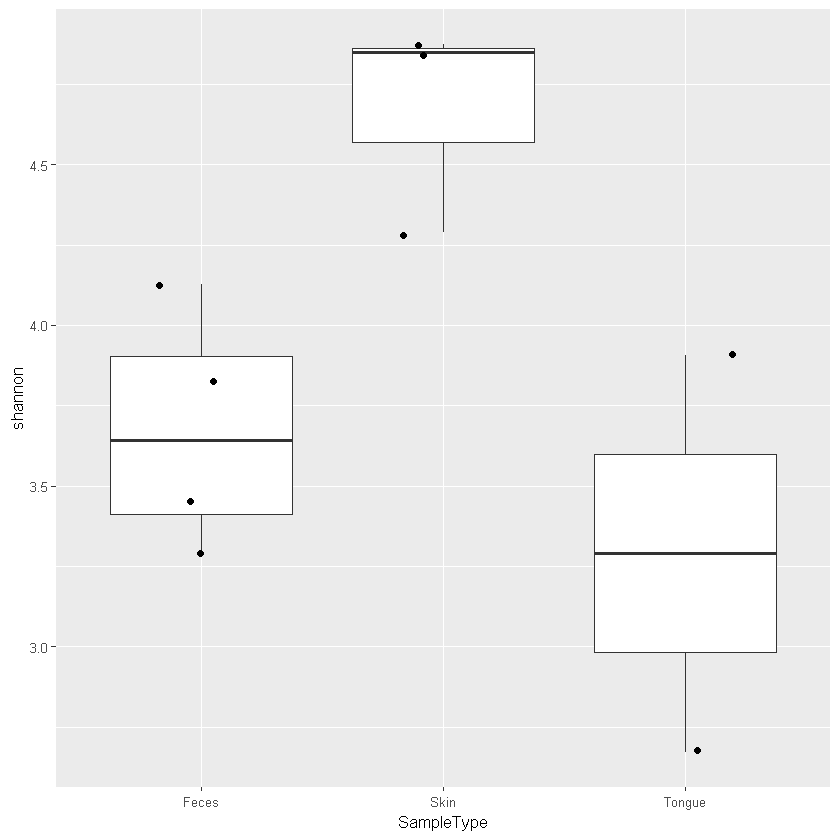

In [35]:
library(ggplot2)
library(patchwork)

# Subsets the data. Takes only those samples that are from feces, skin, or tongue,
# and creates data frame from the collected data
df <- as.data.frame(colData(tse)[colData(tse)$SampleType %in% 
                                  c("Feces", "Skin", "Tongue"), ])

# Changes old levels with new levels
df$SampleType <- factor(df$SampleType)

ggplot(df, aes(x = SampleType, y = shannon)) +
  # Outliers are removed, because otherwise each data point would be plotted twice; 
  # as an outlier of boxplot and as a point of dotplot.
  geom_boxplot(outlier.shape = NA) + 
  geom_jitter(width = 0.2) +
  theme(text = element_text(size = 10))

#### Phylogenetic measures

The Faith index is returned by the function `estimateFaith`

In [36]:
tse <- mia::estimateFaith(tse,name='faith',
                          abund_values = "counts")
head(colData(tse)$faith)

[1] 250.5354 262.2629 208.4578 117.8762 119.8247 135.7673

tse's ownphylogenetic tree is used by default.   
However, the optional argument tree must be provided if tse does not contain one

We can compate between the shannon and faith indices.

Loading required package: scuttle



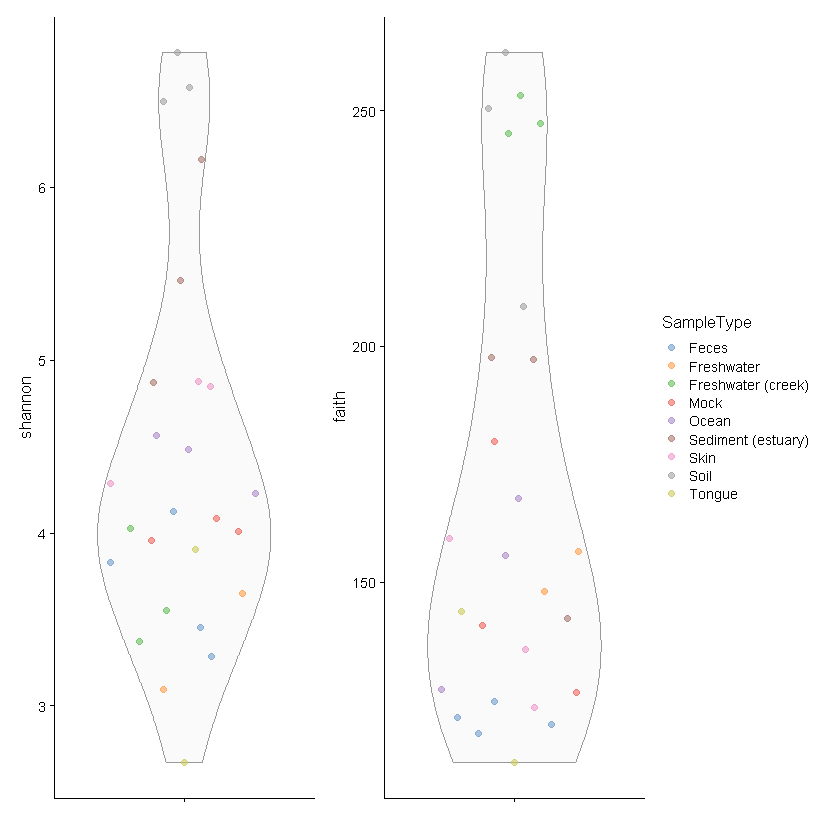

In [37]:
library(scater)
plots <- lapply(c("shannon", "faith"),
                plotColData,
                object = tse, colour_by = "SampleType")
plots[[1]] + plots[[2]] +
  plot_layout(guides = "collect")

### Beta-Diversity <a name="beta"></a>

Where alpha diversity focuses on community variation within a community (sample),  
beta diversity quantifies similarites/dissimilarites between different communities/samples

In [38]:
tse <- transformCounts(tse, method = "relabundance")

# Add group information Feces yes/no
colData(tse)$Group <- colData(tse)$SampleType=="Feces"

The permutational analysis of variance (PERMANOVA) is a widely used non-parametric multivariate method that can be used to estimate the actual statistical significance of differences in the observed community composition between two groups of samples.

PERMANOVA evaluates the hypothesis that the centroids and dispersion of the community are equivalent between the compared groups. A small p-value indicates that the compared groups have, on average, a different community composition.

In [39]:
permanova <- vegan::adonis(t(assay(tse,"relabundance")) ~ Group,
                           data = colData(tse),
                           permutations = 9999)

# P-value
print(as.data.frame(permanova$aov.tab)["Group", "Pr(>F)"])

[1] 0.001


In this case, the community composition is not significantly different between the groups.

Let us visualize the model coefficients for species that exhibit the largest differences between the groups. To see how the groups differ from each other in terms of community composition.

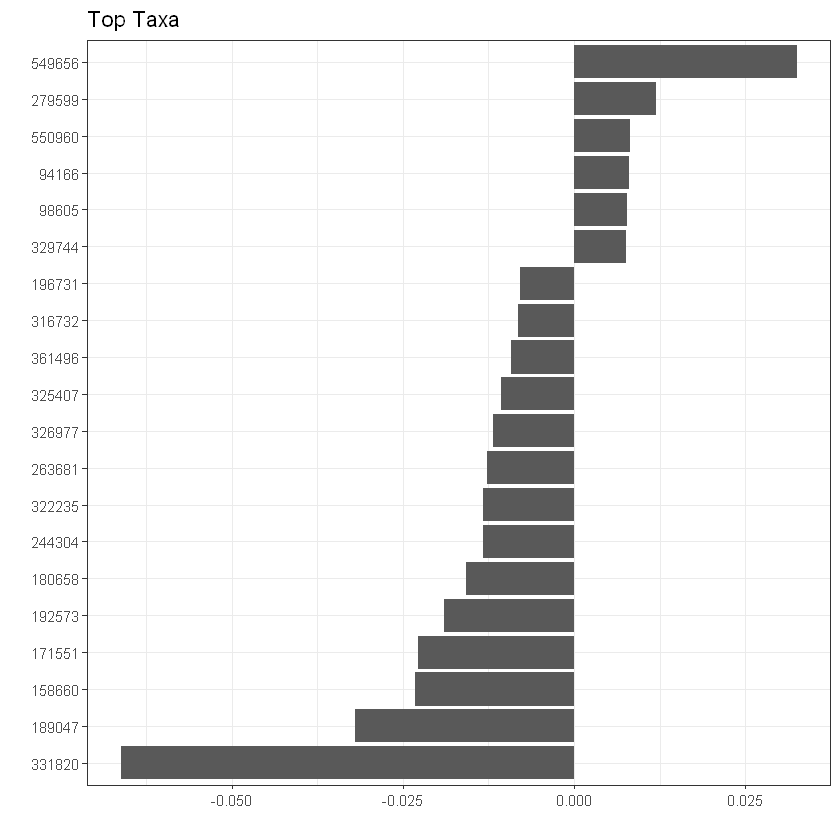

In [40]:
coef <- coefficients(permanova)["Group1",]
top.coef <- sort(head(coef[rev(order(abs(coef)))],20))

ggplot(data.frame(x = top.coef,
                  y = factor(names(top.coef),
                                      unique(names(top.coef)))),
        aes(x = x, y = y)) +
    geom_bar(stat="identity") +
    labs(x="",y="",title="Top Taxa") +
    theme_bw()

The largest differences between the two groups can be attributed to Bacteroides intestinalis (549656) and Faecalibacterium prausnitzii (331820), and many other co-varying species.

## Conclusion <a name="conclusion"></a>

Here we have shown a couple of examples for using the `mia` package.  

The benifits of `mia` is how easy it is to navigate and use the `TreeSummarizedExperiment` datatype, either with preloaded datasets, or an import of your own. Alongside its compatability to preexsisting graphing methods, and multiple built in functions for different calculations.

Allowing you to do all parts of the analysis, from exploration of the data, to diversity analysis, to many many other possible inquries all of which can be found at the following [documentation](https://microbiome.github.io/)  
